# Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
# Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# Combine features and labels into dataset
import pandas as pd
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "labels": y
})
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


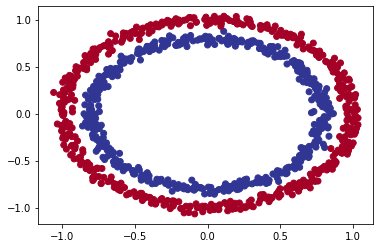

In [6]:
# Visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

## Model 1

In [8]:
# Create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit a model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.9452 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.7114 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.1979 - accuracy: 0.5050
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4970


In [9]:
# Attempts to improve through longer training
model_1.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4940
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4910
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4580
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4510
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4870
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5030
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4870
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5020
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4790
Epoch 11/

In [10]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4780


[0.6931537985801697, 0.4779999852180481]

## Model 2

In [11]:
# Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit a model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.0654 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5130
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4970
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4800
Epoch 11/

In [12]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933231949806213, 0.5]

## Model 3

In [30]:
# Create a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit a model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.9828 - accuracy: 0.4988
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4414 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8631 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7512 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4935
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4972
Epoch 11/

In [14]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000


[0.6966301202774048, 0.5]

## Function to visualise predictions of the model

In [20]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


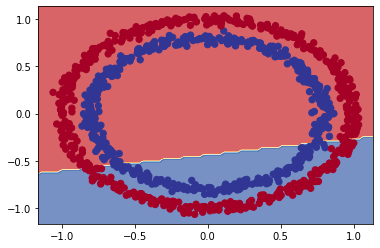

In [24]:
plot_decision_boundary(
    model=model_1,
    X=X,
    y=y
)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


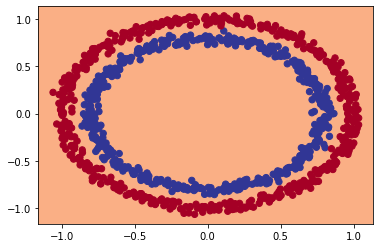

In [25]:
plot_decision_boundary(model_3, X, y)

In [26]:
# Testing the model against regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X +100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [27]:
# Split into training and testing datasets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [34]:
# Fitting our model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 